# Data Analysis

# China analysis...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

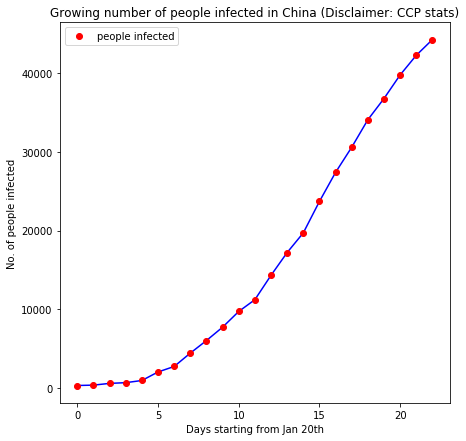

In [3]:
start = "Jan 20th" # start of keeping counts?
# current = "Feb 11th"
china = [278, 326, 547, 639, 916, 2000, 2700, 4400, 6000, 7700, 9700, 11200, 14300, 17200, 19700, 23700, 27400, 30600, 34100, 
         36800, 39800, 42300, 44300]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected in China (Disclaimer: CCP stats)")

plt.plot(range(len(china)), china, 'b-')

for i in range(len(china)):
    a, = plt.plot(i, china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Non-china analysis...

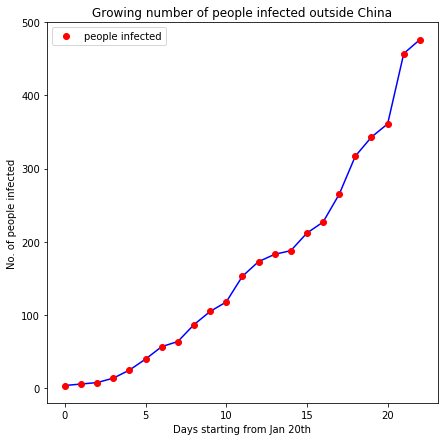

In [4]:
non_china = [4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected outside China")

plt.plot(range(len(non_china)), non_china, 'b-')

for i in range(len(non_china)):
    a, = plt.plot(i, non_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Similarities between China and Non-China vectors...

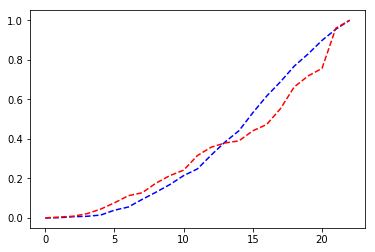

In [5]:
# measuring similarity between vectors

# first each vector is scaled
def scaled(vec):
    # vec: the vector that will be scaled
    
    sca = np.zeros(len(vec)).reshape(-1, 1)
    
    mini, maxi = min(vec), max(vec)
    
    for i in range(sca.shape[0]):
        # scale used: (value - minimum) / (maximum - minimum)
        v = (vec[i] - mini) / (maxi - mini)
        sca[i] = v
    
    return sca

sc_china = scaled(china)
sc_non = scaled(non_china)

plt.plot(np.arange(len(sc_china)), sc_china, 'b--')
plt.plot(np.arange(len(sc_non)), sc_non, 'r--')

# Using distance metrics...

In [6]:
# distance using the l2 norm - euclidean distance
def euclid(x1, x2):
    # x1: the first vector
    # x2: the second vector
    # returns the distance between each vector and the cumulative distance
    
    if len(x1) != len(x2):
        print("vector lengths are not equal!!")
        return 0
    
    tot = 0
    res = []
    for i in range(len(x1)):
        square = (x1[i] - x2[i]) ** 2
        tot = tot + square
        res.append(np.sqrt(square))
        
    sqroot = np.sqrt(tot)
    
    return sqroot, res


# distance using the l1 norm - manhattan distance
def manhat(x1, x2):
    # x1: the first vector
    # x2: the second vector
    # returns difference in distance at each point and the cumulative distance
    
    if len(x1) != len(x2):
        print("vector lengths are not equal!!")
        return 0
    
    tot = 0
    res = []
    for i in range(len(x1)):
        absol = abs(x1[i] - x2[i])
        tot = tot + absol
        res.append(absol)
        
    return tot, res


# distance using the max metric - chebyshev distance
def cheby(x1, x2):
    # x1: the first vector
    # x2: the second vector
    # returns the difference in distance at each point and the max difference
    
    if len(x1) != len(x2):
        print("vector lengths are not equal")
        return 0
    
    res = []
    for i in range(len(x1)):
        absol = abs(x1[i] - x2[i])
        res.append(absol)
        
    return max(res), res

In [7]:
# examining euclid on og data
og_eucd, og_eucl = euclid(china, non_china)
print("l2 on og data: ", og_eucd)
print("list on og data: ", og_eucl)

l2 on og data:  105428.34589900383
list on og data:  [274.0, 320.0, 539.0, 625.0, 891.0, 1960.0, 2643.0, 4336.0, 5913.0, 7595.0, 9582.0, 11047.0, 14127.0, 17017.0, 19512.0, 23488.0, 27173.0, 30335.0, 33783.0, 36457.0, 39439.0, 41843.0, 43824.0]


In [8]:
# examining euclid on norm data
norm_eucd, norm_eucl = euclid(sc_china, sc_non)
print("l2 on norm data: ", norm_eucd)
print("list on norm data: ", norm_eucl)

l2 on norm data:  [0.33392826]
list on norm data:  [array([0.]), array([0.00314692]), array([0.002364]), array([0.012986]), array([0.02999877]), array([0.03715438]), array([0.05727019]), array([0.03348364]), array([0.04586699]), array([0.04538553]), array([0.02749607]), array([0.06757474]), array([0.03952829]), array([0.00516142]), array([0.05135799]), array([0.09137419]), array([0.14364341]), array([0.13582587]), array([0.10516208]), array([0.1114103]), array([0.14142245]), array([0.00517759]), array([0.])]


In [9]:
# examining manhattan on og data
og_mand, og_manl = manhat(china, non_china)
print("l1 on og data: ", og_mand)
print("list on og data: ", og_manl)

l1 on og data:  372723
list on og data:  [274, 320, 539, 625, 891, 1960, 2643, 4336, 5913, 7595, 9582, 11047, 14127, 17017, 19512, 23488, 27173, 30335, 33783, 36457, 39439, 41843, 43824]


In [10]:
# examining manhattan on norm data
norm_mand, norm_manl = manhat(sc_china, sc_non)
print("l1 on norm data: ", norm_mand)
print("list on norm data: ", norm_manl)

l1 on norm data:  [1.19279083]
list on norm data:  [array([0.]), array([0.00314692]), array([0.002364]), array([0.012986]), array([0.02999877]), array([0.03715438]), array([0.05727019]), array([0.03348364]), array([0.04586699]), array([0.04538553]), array([0.02749607]), array([0.06757474]), array([0.03952829]), array([0.00516142]), array([0.05135799]), array([0.09137419]), array([0.14364341]), array([0.13582587]), array([0.10516208]), array([0.1114103]), array([0.14142245]), array([0.00517759]), array([0.])]


In [11]:
# examining chebyshev on og data
og_ched, og_chel = cheby(china, non_china)
print("max on the og data: ", og_ched)
print("list of og data: ", og_chel)

max on the og data:  43824
list of og data:  [274, 320, 539, 625, 891, 1960, 2643, 4336, 5913, 7595, 9582, 11047, 14127, 17017, 19512, 23488, 27173, 30335, 33783, 36457, 39439, 41843, 43824]


In [12]:
# examining chebyshev on the norm data
norm_ched, norm_chel = cheby(sc_china, sc_non)
print("max on the norm data: ", norm_ched)
print("list of norm data: ", norm_chel)

max on the norm data:  [0.14364341]
list of norm data:  [array([0.]), array([0.00314692]), array([0.002364]), array([0.012986]), array([0.02999877]), array([0.03715438]), array([0.05727019]), array([0.03348364]), array([0.04586699]), array([0.04538553]), array([0.02749607]), array([0.06757474]), array([0.03952829]), array([0.00516142]), array([0.05135799]), array([0.09137419]), array([0.14364341]), array([0.13582587]), array([0.10516208]), array([0.1114103]), array([0.14142245]), array([0.00517759]), array([0.])]


# DataFrame Analysis...

In [13]:
import pandas as pd

chid, nond = dict(), dict()
chid['days'], nond['days'] = [x for x in range(1, len(china)+1)], [x for x in range(1, len(non_china)+1)]
chid['infected'], nond['infected'] = china, non_china

pdchi, pdnon = pd.DataFrame(chid), pd.DataFrame(nond)
pdchi

,days,infected
0,1,278
1,2,326
2,3,547
3,4,639
4,5,916
5,6,2000
6,7,2700
7,8,4400
8,9,6000
9,10,7700


In [14]:
pdchi.corr()

,days,infected
days,1.000000,0.968664
infected,0.968664,1.000000


In [16]:
pdchi.describe()

,days,infected
count,23.00000,23.000000
mean,12.00000,16374.173913
std,6.78233,15330.729695
min,1.00000,278.000000
25%,6.50000,2350.000000
50%,12.00000,11200.000000
75%,17.50000,29000.000000
max,23.00000,44300.000000


In [15]:
pdnon.corr()

,days,infected
days,1.000000,0.967285
infected,0.967285,1.000000


In [15]:
pdnon.describe()

,days,infected
count,23.00000,23.000000
mean,12.00000,168.826087
std,6.78233,144.537083
min,1.00000,4.000000
25%,6.50000,48.500000
50%,12.00000,153.000000
75%,17.50000,246.000000
max,23.00000,476.000000


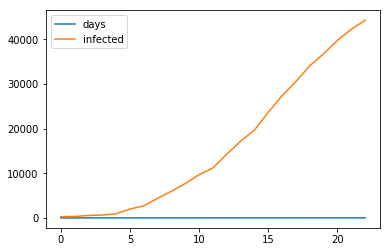

In [19]:
pdchi.plot()

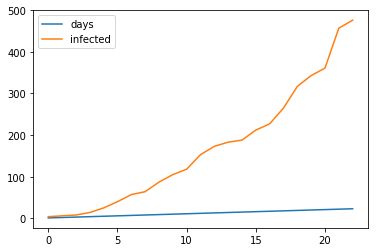

In [21]:
pdnon.plot()